# Import Libraries

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
import os
import sys
import zipfile
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
FILE_NAME = '\\StateWise-Data'
import glob

# Read the dataset 

In [3]:
absolutepath = os.path.dirname(os.path.abspath("__file__"))
print(absolutepath)

fileDirectory = os.path.dirname(absolutepath)
print(fileDirectory)#Path of parent directory
parentDirectory = os.path.dirname(fileDirectory)
print(parentDirectory)
#Navigate to Strings directory
newPath = os.path.join(parentDirectory, 'data', 'raw')   

print(newPath)

C:\Users\vgarg\Documents\GitHub\Recommendation-System-for-YT\notebook\Preprocessing
C:\Users\vgarg\Documents\GitHub\Recommendation-System-for-YT\notebook
C:\Users\vgarg\Documents\GitHub\Recommendation-System-for-YT
C:\Users\vgarg\Documents\GitHub\Recommendation-System-for-YT\data\raw


In [4]:
# unzipping the datafile from data raw folder to 
with zipfile.ZipFile(newPath+FILE_NAME+'.zip',"r") as zip_ref:
    zip_ref.extractall(absolutepath)

In [5]:
data_files = []
for root,dirs,files in os.walk(absolutepath):
    for file in files:
#         print(files,'\n','\n')
        if (file.find('csv')>1):
            data_files.append(root+'\\'+file)
        if(file.find('txt')>1):
            stop_word_file = root+'\\'+file


print('Stop word file:- ',stop_word_file,'\n')
print('Data files:- ',data_files,"\n")


Stop word file:-  C:\Users\vgarg\Documents\GitHub\Recommendation-System-for-YT\notebook\Preprocessing\resources\stopwords.txt 

Data files:-  ['C:\\Users\\vgarg\\Documents\\GitHub\\Recommendation-System-for-YT\\notebook\\Preprocessing\\StateWise-Data\\Chattishgarh\\youTubeSearchListChattishgarh.csv', 'C:\\Users\\vgarg\\Documents\\GitHub\\Recommendation-System-for-YT\\notebook\\Preprocessing\\StateWise-Data\\Haryana\\youTubeSearchListHaryana.csv', 'C:\\Users\\vgarg\\Documents\\GitHub\\Recommendation-System-for-YT\\notebook\\Preprocessing\\StateWise-Data\\MadhyaPradesh\\youTubeSearchListMadyaPradesh.csv', 'C:\\Users\\vgarg\\Documents\\GitHub\\Recommendation-System-for-YT\\notebook\\Preprocessing\\StateWise-Data\\Maharastra\\youTubeSearchListMaharastra.csv', 'C:\\Users\\vgarg\\Documents\\GitHub\\Recommendation-System-for-YT\\notebook\\Preprocessing\\StateWise-Data\\TamilNadu\\youTubeSearchListTamilNadu.csv', 'C:\\Users\\vgarg\\Documents\\GitHub\\Recommendation-System-for-YT\\notebook\\Pre

In [6]:

df = pd.read_csv(data_files[4],index_col=[0])

In [7]:
df.head()

,ContentId,title,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,description,duration,tags
0,DPgTI-qO_uc,True beauty #shors#Truebeauty#kdrama#LeeSuHo#H...,5,1,0,0,0,2021-10-06T18:31:40Z,NaN,PT40S,[]
1,07MEle9JSdo,penthouse #shorts#kdrama#koreandrama#edit#kdra...,7,1,0,0,0,2021-10-05T19:13:52Z,NaN,PT14S,[]
2,AIH02FlY-Qc,💔💔 #shorts#kdrama#koreandrama#edit#kdramaedit#...,6,1,0,0,0,2021-10-05T19:09:04Z,NaN,PT9S,[]
3,t9ISH4DtrM4,🔥🔥🔥 #shorts#kdramaedit#kdrama#itsoknottobeokay...,6,2,0,0,0,2021-09-21T18:47:25Z,NaN,PT11S,[]
4,Pr4BEqNMYBA,This scene 😯😍🔥 #shorts#kdrama#doomatyourservic...,1,1,0,0,0,2021-09-20T17:51:11Z,NaN,PT22S,[]


In [8]:
df.shape

(136349, 11)

# Check for null value count

In [9]:
df.isnull().sum()

ContentId            0
title                0
viewCount        31482
likeCount        31482
dislikeCount     31482
commentCount     31482
favoriteCount    31482
publishedAt      31482
description      34621
duration         31483
tags             31483
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136349 entries, 0 to 104866
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ContentId      136349 non-null  object
 1   title          136349 non-null  object
 2   viewCount      104867 non-null  object
 3   likeCount      104867 non-null  object
 4   dislikeCount   104867 non-null  object
 5   commentCount   104867 non-null  object
 6   favoriteCount  104867 non-null  object
 7   publishedAt    104867 non-null  object
 8   description    101728 non-null  object
 9   duration       104866 non-null  object
 10  tags           104866 non-null  object
dtypes: object(11)
memory usage: 12.5+ MB


# Converting Object dtype to strings

In [11]:
df['title'] = df['title'].convert_dtypes()
df['description'] = df['description'].convert_dtypes()
df['tags'] = df['tags'].convert_dtypes()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136349 entries, 0 to 104866
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ContentId      136349 non-null  object
 1   title          136349 non-null  string
 2   viewCount      104867 non-null  object
 3   likeCount      104867 non-null  object
 4   dislikeCount   104867 non-null  object
 5   commentCount   104867 non-null  object
 6   favoriteCount  104867 non-null  object
 7   publishedAt    104867 non-null  object
 8   description    101728 non-null  string
 9   duration       104866 non-null  object
 10  tags           104866 non-null  string
dtypes: object(8), string(3)
memory usage: 12.5+ MB


# Dropping Null Values

In [13]:
df = df.dropna()
df = df.reset_index(drop=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101727 entries, 0 to 101726
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ContentId      101727 non-null  object
 1   title          101727 non-null  string
 2   viewCount      101727 non-null  object
 3   likeCount      101727 non-null  object
 4   dislikeCount   101727 non-null  object
 5   commentCount   101727 non-null  object
 6   favoriteCount  101727 non-null  object
 7   publishedAt    101727 non-null  object
 8   description    101727 non-null  string
 9   duration       101727 non-null  object
 10  tags           101727 non-null  string
dtypes: object(8), string(3)
memory usage: 8.5+ MB


In [15]:
df.isnull().sum()

ContentId        0
title            0
viewCount        0
likeCount        0
dislikeCount     0
commentCount     0
favoriteCount    0
publishedAt      0
description      0
duration         0
tags             0
dtype: int64

# Removing tags, special characters and digits, convert to lower case

In [ ]:
import re
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("","",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text

df['text'] = df['title'] + df['description'] + df['tags']
df['text'] = df['text'].apply(lambda x:pre_process(x))

In [ ]:
#show the 10861 'text' just for fun
for x in range(101726):
    print(df['text'][x])

# Create a vocabulary of words, 
Ignore words that appear in 85% of documents, 
Eliminate stop words

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
import re

def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)

#load a set of stop words
stopwords=get_stop_words(stop_word_file)

# print(stopwords)
#get the text column 
docs=df['text'].tolist()

#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.85,stop_words=stopwords)
word_count_vector=cv.fit_transform(docs)

In [40]:
list(cv.vocabulary_.keys())[:10]

['learn',
 'drama',
 'kdrama',
 'koreandrama',
 'kcdrama',
 'koreanwords',
 'annyeong',
 'kdramagirls',
 'hello',
 'lovers']

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [42]:
# you only needs to do this once, this is a mapping of index to 
feature_names=cv.get_feature_names()

## Word Cloud

In [43]:
all_words = cv.vocabulary_
all_words

{'learn': 103974,
 'drama': 48611,
 'kdrama': 96112,
 'koreandrama': 100098,
 'kcdrama': 96041,
 'koreanwords': 100110,
 'annyeong': 8193,
 'kdramagirls': 96114,
 'hello': 75752,
 'lovers': 107593,
 'made': 109158,
 'ew': 56203,
 'edit': 50855,
 'hope': 78642,
 'll': 106360,
 'like': 105443,
 'share': 165604,
 'subscribe': 176859,
 'comment': 36128,
 'channel': 31217,
 'tysm': 190668,
 'keep': 96194,
 'supporting': 178253,
 'love': 107363,
 'alarm': 5396,
 'mv': 122018,
 'señorita': 164782,
 'shawn': 165887,
 'mendes': 114803,
 'korean': 100092,
 'mix': 117252,
 'song': 171594,
 'ytvideo': 206650,
 'lovealarms': 107418,
 'lovealarm': 107417,
 'kdramamv': 96116,
 'kdramalovealarm': 96115,
 'musicvideo': 121780,
 'koreanmix': 100101,
 'lover': 107573,
 'short': 167061,
 'thank': 183652,
 'suppourting': 178270,
 'savage': 161909,
 'girls': 68413,
 'part': 135998,
 'down': 48299,
 'first': 60085,
 'savagegirlsjkoreandrama': 161913,
 'howyoulikethatpart': 79776,
 'guys': 72069,
 'savgegirls

In [70]:
def keyfunction(k):
    return all_words[k]

top_word = {}
# sort by dictionary by the values and print top 50 items
for key in sorted(all_words, key=keyfunction, reverse=True)[:50]:
    try:
        top_word[key] = all_words[key]
    except:
        pass
del top_word['𡰽𡰠']
top_word

{'𝚜𝚞𝚛𝚎𝚗𝚍𝚛𝚊𝚗𝚊𝚐𝚟𝚊𝚗𝚜𝚑𝚒': 219123,
 '𝚜𝚞𝚛𝚎𝚗𝚍𝚛𝚊': 219122,
 '𝚛𝚊𝚗𝚐': 219121,
 '𝚙𝚒𝚕𝚎': 219120,
 '𝚗𝚊𝚐𝚟𝚊𝚗𝚂𝚑𝚒': 219119,
 '𝚗𝚊𝚐𝚟𝚊𝚗𝙶𝚊𝚍𝚍𝚒': 219118,
 '𝚕𝚒𝚟𝚎': 219117,
 '𝚕𝚊𝚒𝚖𝚐𝚒𝚗𝚒': 219116,
 '𝚔𝚑𝚊𝚗': 219115,
 '𝚎𝚖𝚛𝚊𝚗': 219114,
 '𝚍𝚒': 219113,
 '𝚆𝙰𝚃𝙲𝙷𝙸𝙽𝙶': 219112,
 '𝚅𝙸𝚂𝙷𝙽𝚄': 219111,
 '𝚃𝚑𝚞𝚛𝚜𝚍𝚊𝚢': 219110,
 '𝚃𝙷𝙰𝙽𝙺𝚂': 219109,
 '𝙿𝚁𝙾': 219108,
 '𝙿𝚁𝙰𝙺𝙰𝚂𝙷': 219107,
 '𝙾𝚠𝚗𝚎𝚛〲𝙿𝚊𝚛𝚒𝚖𝚊𝚕': 219106,
 '𝙷𝚊𝚗𝚜𝚍𝚊': 219105,
 '𝙶𝚊𝚍𝚍𝚒': 219104,
 '𝙶𝙸𝚃𝙴𝚂𝙷': 219103,
 '𝙶𝙰𝚄𝚃𝙰𝙼': 219102,
 '𝙶𝙰𝙼𝙸𝙽𝙶': 219101,
 '𝙵𝙾𝚁': 219100,
 '𝙴𝚟𝚎𝚗𝚒𝚗𝚐': 219099,
 '𝙲𝙶': 219098,
 '𝙩𝙤': 219097,
 '𝙩𝙝𝙚': 219096,
 '𝙨𝙪𝙜𝙜𝙚𝙨𝙩𝙞𝙤𝙣𝙨': 219095,
 '𝙨𝙪𝙗𝙘𝙧𝙞𝙗𝙚': 219094,
 '𝙨𝙝𝙖𝙧𝙀': 219093,
 '𝙨𝙚𝙚𝙠𝙝𝙤': 219092,
 '𝙨𝙖𝙩𝙝': 219091,
 '𝙧𝙞𝙜𝙝𝙩𝙨': 219090,
 '𝙧𝙚𝙨𝙥𝙚𝙘𝙩𝙞𝙫𝙚': 219089,
 '𝙧𝙚𝙨𝙚𝙧𝙫𝙚𝙙': 219088,
 '𝙤𝙬𝙣𝙚𝙧𝙨': 219087,
 '𝙤𝙧': 219086,
 '𝙢𝙮': 219085,
 '𝙢𝙚𝙚': 219084,
 '𝙢𝙚': 219083,
 '𝙠𝙝𝙞𝙡𝘼𝙛': 219082,
 '𝙠𝘼': 219081,
 '𝙞𝙣𝙩𝙚𝙣𝙙𝙚𝙙': 219080,
 '𝙝𝙤𝙣𝘼': 219079,
 '𝙚𝙡𝙨𝙚': 219078,
 '𝙙𝙚𝙣𝘼': 219077,
 '𝙘𝙤𝙢𝙥𝙡𝙖𝙞𝙣𝙩𝙨': 219076,
 '𝙘𝙝𝙖𝙣𝙣𝙚𝙡': 219075}

In [71]:
cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(top_word)

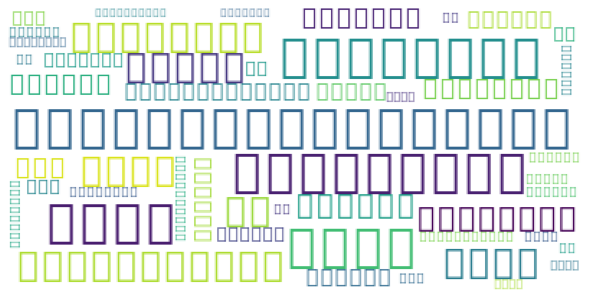

In [72]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Generate tf-idf for the given document

In [24]:
i = 0
tex_list = df['text'].tolist()
tf_idf_vector_list = []
for i in range(len(tex_list)):
    tf_idf_vector=tfidf_transformer.transform(cv.transform([tex_list[i]]))
    i = i+1
    tf_idf_vector_list.append(tf_idf_vector)
    # added to list  
    if ((i%10000) == 0):
        print ('Collecting tf-idf',i)
print(len(tf_idf_vector_list))

101727


In [25]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

# Sort the tf-idf vectors by descending order of scores

In [26]:
sorted_items_list=[]
i=0
for i in range(len(tf_idf_vector_list)):
    sorted_items=sort_coo(tf_idf_vector_list[i].tocoo())
    i = i+1
    sorted_items_list.append(sorted_items)
    # added to list  
    if ((i%10000) == 0):
        print ('Sorting Done for',i)

Sorting Done for 10000
Sorting Done for 20000
Sorting Done for 30000
Sorting Done for 40000
Sorting Done for 50000
Sorting Done for 60000
Sorting Done for 70000
Sorting Done for 80000
Sorting Done for 90000
Sorting Done for 100000


In [27]:
len(sorted_items_list)

101727

# Extract only the top n; n here is 5

In [28]:
def extract_topn_from_vector(feature_names, sorted_items, topn=5):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [29]:
keyword_list = []
i=0
for i in range(len(sorted_items_list)):
    keywords=extract_topn_from_vector(feature_names,sorted_items_list[i],5)
    i = i+1
    keyword_list.append(keywords)
    # added to list  
    if ((i%10000) == 0):
        print ('Keywords added for',i)

Keywords added for 10000
Keywords added for 20000
Keywords added for 30000
Keywords added for 40000
Keywords added for 50000
Keywords added for 60000
Keywords added for 70000
Keywords added for 80000
Keywords added for 90000
Keywords added for 100000


In [30]:
keyword_list[0:5]

[{'kdrama': 0.463,
  'koreanwords': 0.31,
  'kdramagirls': 0.31,
  'annyeong': 0.31,
  'kcdrama': 0.299},
 {'mv': 0.524,
  'lovealarms': 0.385,
  'señorita': 0.318,
  'alarm': 0.263,
  'ytvideo': 0.193},
 {'kdrama': 0.428,
  'savgegirls': 0.287,
  'savagegirlsjkoreandrama': 0.287,
  'howyoulikethatpart': 0.287,
  'dlcfhts': 0.287},
 {'thetaleoftheninetailedep': 0.366,
  'engsub': 0.344,
  'tailed': 0.332,
  'kdrama': 0.273,
  'part': 0.245},
 {'thetaleoftheninetailedepisode': 0.431,
  'thetaleoftheninetailedfullepisode': 0.216,
  'leeyoen': 0.216,
  'koreandramawithengsub': 0.216,
  'kdramaengsub': 0.216}]

In [31]:
# now print the results
for i  in range(5):
    print("\n=====Title=====")
    print(df['title'][i])
    print("\n=====Description=====")
    print(df['description'][i])
    print("\n===Top5 Keywords===")
    for k in keyword_list[i]:
        print(k,keyword_list[i][k])


=====Title=====
Things I learn from k drama

=====Description=====
#kdrama#koreandrama#kcdrama#koreanwords#annyeong#kdramagirls



********************************************

Hello kdrama lovers!! 
I made a ew edit for all of you i hope all of you ll like it if you like it please like share subscribe and do comment to my channel
Tysm ♥ 
keep supporting ♥

===Top5 Keywords===
kdrama 0.463
koreanwords 0.31
kdramagirls 0.31
annyeong 0.31
kcdrama 0.299

=====Title=====
Love alarm mv x Señorita shawn mendes korean mix song

=====Description=====
#kdrama#ytvideo#lovealarms1mv#mv#lovealarm#lovealarms1#kdramamv#señorita#kdramalovealarm#musicvideo#koreanmix

********************************************

Hello!! 
K-drama lover i made a short mv of love alarm i hope all of you like it if you like it please like share and do subscribe to my channel.
Thank you ♥ 
Keep suppourting ❤❤

===Top5 Keywords===
mv 0.524
lovealarms 0.385
señorita 0.318
alarm 0.263
ytvideo 0.193

=====Title=====
K-drama s